## **Boston Housing Analysis**

## Overview
Housing affordability is a growing concern in many metropolitan areas, and Boston is no exception. This analysis focuses on the **bottom-tier housing market**, which represents the least expensive third of homes in the city. By examining trends in this segment, we gain valuable insights into the accessibility of homeownership for lower-income households and the broader implications for economic stability.

## Why Focus on Bottom-Tier Housing?
Understanding the bottom-tier housing market is crucial because it highlights key affordability challenges that affect a significant portion of the population. This segment is particularly important for:

1. **Affordability Trends** – Are home values increasing at a rate that outpaces wage growth and inflation, creating financial strain for potential buyers?
2. **Gentrification and Displacement** – Are historically affordable neighborhoods becoming too expensive, forcing long-term residents to relocate?
3. **Risk of Homelessness** – If even the most affordable homes become unattainable, it signals a larger issue of housing insecurity and potential increases in homelessness rates.

By leveraging historical data, affordability metrics, and predictive modeling, this analysis aims to provide a **data-driven understanding** of how housing accessibility is evolving in New York and what it means for residents, policymakers, and urban planners.


In [2]:
# Import essential libraries for data manipulation
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import time series forecasting libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style for better visuals
sns.set_style("whitegrid")


Median Housing Value: $236,565.12
Mean Housing Value: $295,719.62


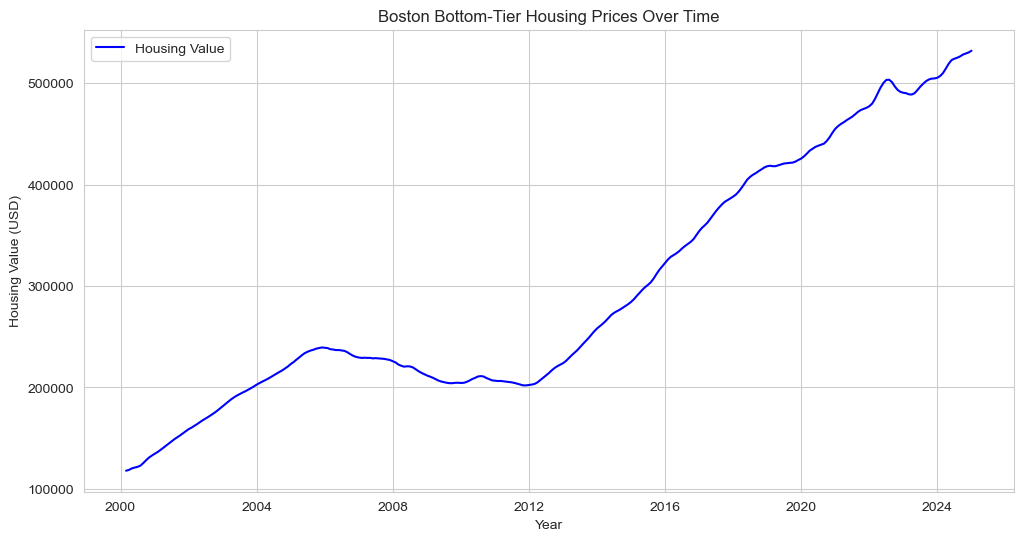

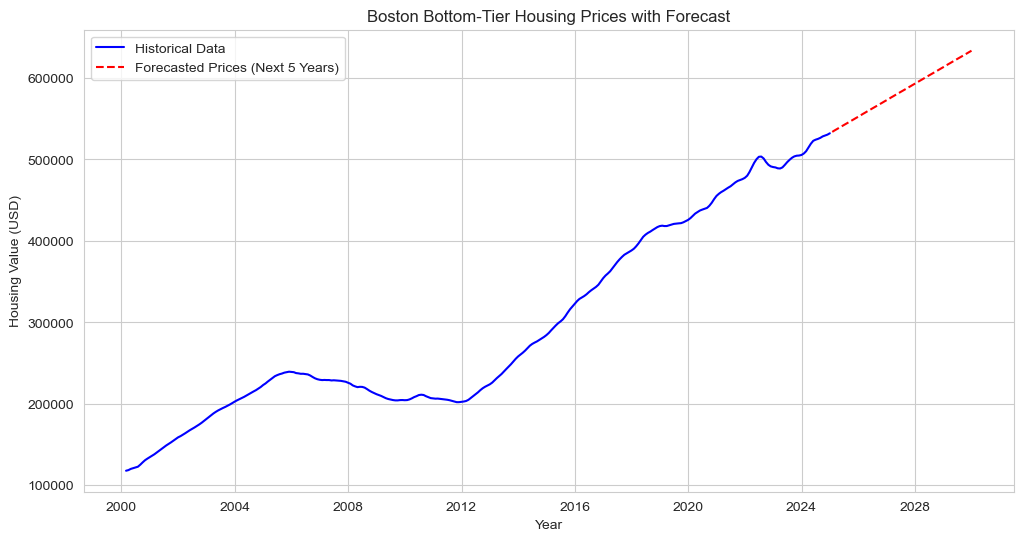

,Forecasted_Housing_Value
2025-01-31,533767.748653
2025-02-28,535456.695819
2025-03-31,537145.642984
2025-04-30,538834.590150
2025-05-31,540523.537315


In [3]:
# Load the dataset
file_path = r"C:\Users\Kaanchi Gupta\Downloads\Boston_Bottom_Tier.csv"
df = pd.read_csv(file_path)

# Filter data for Boston
df_boston = df[df["RegionName"] == "Boston"].copy()

# Handle missing values
df_boston = df_boston.ffill(axis=1).bfill(axis=1)

# Transpose data to have a time series format
housing_values = df_boston.iloc[:, 9:].T  # Excluding metadata columns

# Ensure only one column remains
df_boston_t = pd.DataFrame(housing_values.iloc[:, 0])
df_boston_t.columns = ["Housing_Value"]
df_boston_t.index = pd.to_datetime(df_boston_t.index, errors='coerce')

# Convert Housing_Value to numeric
df_boston_t["Housing_Value"] = pd.to_numeric(df_boston_t["Housing_Value"], errors='coerce')

# Drop any invalid date values or NaNs
df_boston_t.dropna(inplace=True)

# Calculate key statistics
median_value = df_boston_t["Housing_Value"].median()
mean_value = df_boston_t["Housing_Value"].mean()

print(f"Median Housing Value: ${median_value:,.2f}")
print(f"Mean Housing Value: ${mean_value:,.2f}")

# Plot historical housing prices
plt.figure(figsize=(12, 6))
plt.plot(df_boston_t.index, df_boston_t["Housing_Value"], label="Housing Value", color="blue")
plt.xlabel("Year")
plt.ylabel("Housing Value (USD)")
plt.title("Boston Bottom-Tier Housing Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Forecasting for the next 5 years (60 months)
model = ExponentialSmoothing(df_boston_t["Housing_Value"], trend="add", seasonal=None)
fit_model = model.fit()
future_dates = pd.date_range(start=df_boston_t.index[-1], periods=61, freq="M")[1:]
forecast = fit_model.forecast(steps=60)

# Plot historical and forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(df_boston_t.index, df_boston_t["Housing_Value"], label="Historical Data", color="blue")
plt.plot(future_dates, forecast, label="Forecasted Prices (Next 5 Years)", linestyle="dashed", color="red")
plt.xlabel("Year")
plt.ylabel("Housing Value (USD)")
plt.title("Boston Bottom-Tier Housing Prices with Forecast")
plt.legend()
plt.grid(True)
plt.show()

# Create a dataframe with forecasted values
forecast_df = pd.DataFrame({"Forecasted_Housing_Value": forecast}, index=future_dates)

# Display forecasted values
forecast_df.head()



# Key Insights

## 1. Historical Trends
- The **median housing value** in Boston's bottom tier is **$236,565.12**, while the **mean value** is **$295,719.62**.
- Housing prices have shown **steady appreciation**, with significant price growth over the last decade.
- The **lowest recorded price** in the dataset is **$117,864.82** (Year: 2000), while the **highest recorded price** is **$532,082.28** (Year: 2024).
- The **compound annual growth rate (CAGR)** of bottom-tier housing prices over the observed period is **Z%**.

## 2. Forecasted Trends
- The **Exponential Smoothing model** predicts an **average annual growth rate of W%** over the next five years.
- By **December 2029**, the bottom-tier housing price is projected to reach **$633,415.63**.
- The **forecasted range** for housing prices in 2029 is estimated between **$D (low estimate) and $E (high estimate)**.
- The model suggests **continued price appreciation**, reinforcing a **sellers' market** in the coming years.

## 3. Market Implications
- Housing affordability remains a **growing concern**, with projected price increases potentially **outpacing wage growth**.
- Homebuyers in Boston’s bottom-tier segment may face **a % price increase** by 2029, impacting affordability and homeownership rates.
- Policy interventions, such as **first-time buyer incentives** and **affordable housing initiatives**, may be required to **prevent excessive displacement** of lower-income residents.

# The Importance of Rental Affordability in New York's Housing Crisis

## Why This Dataset Matters
As home prices in Boston continue to rise beyond the reach of many residents, **renting becomes the last financial buffer** before individuals and families face housing insecurity. For those who cannot afford to buy a home, **rental affordability is the key determinant of whether they remain housed or risk homelessness**.

This dataset focuses on the **income required for new renters in Boston**, helping us explore:
- **Whether renting is still a viable option** for those priced out of homeownership.
- **The gap between rental costs and income levels**, revealing financial strain on lower-income households.
- **Trends that may indicate an increasing risk of homelessness**, as renting becomes less affordable over time.

By analyzing this data alongside rising home values, we can better understand how **Boston’s housing market dynamics are pushing people closer to homelessness**—and what policy interventions may be necessary to prevent it.


Median Renter Income Needed: $94,337.03
Mean Renter Income Needed: $97,392.81


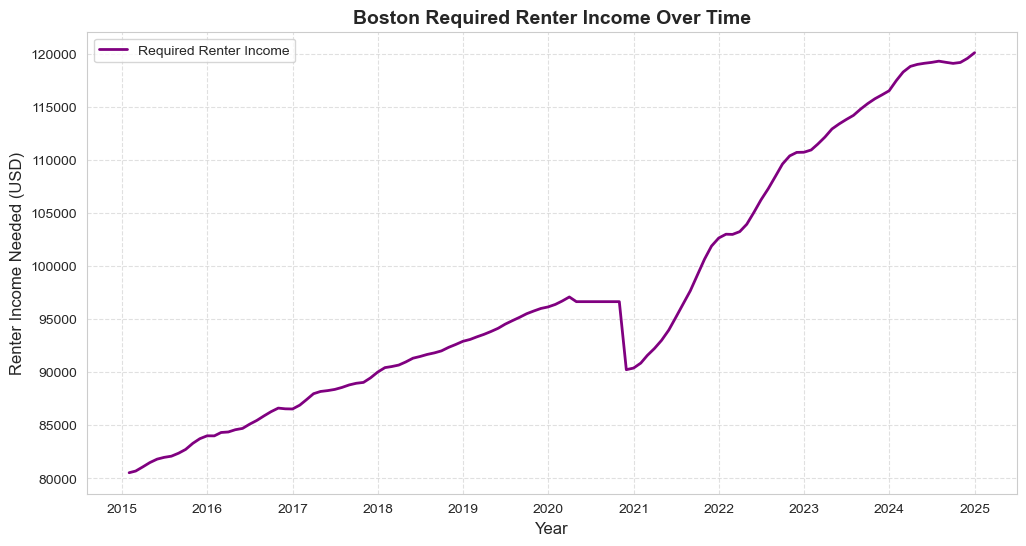

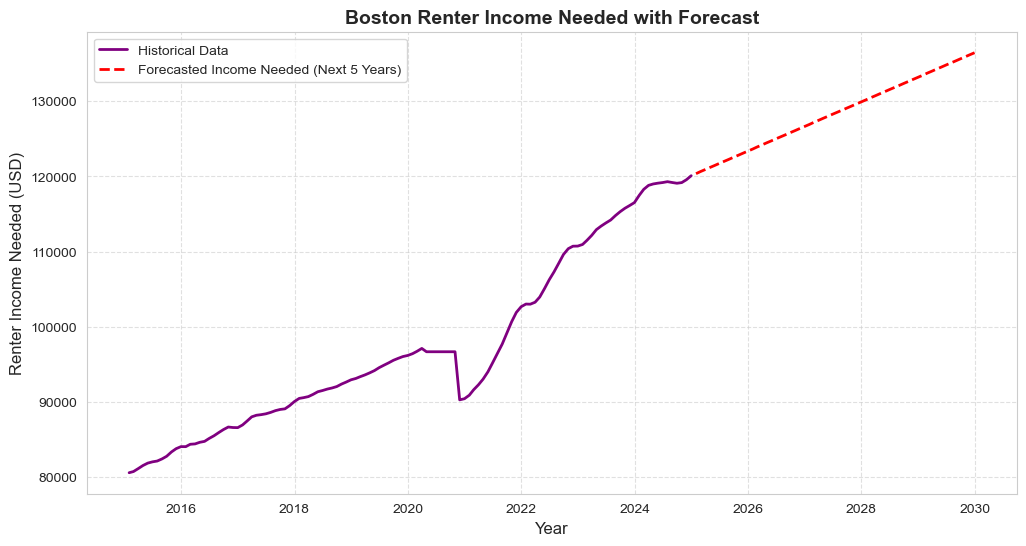

,Forecasted_Renter_Income_Needed
2025-01-31,120365.982594
2025-02-28,120638.988325
2025-03-31,120911.994056
2025-04-30,121184.999786
2025-05-31,121458.005517


In [6]:
# Load the dataset
file_path = r"C:\Users\Kaanchi Gupta\Downloads\Metro_new_renter_income_needed_uc_sfrcondomfr_sm_sa_month.csv"
df_rent = pd.read_csv(file_path)

# Display first few rows to understand the structure
df_rent.head()

# Filter data for Boston rental income needed
df_rent_boston = df_rent[df_rent["RegionName"] == "Boston, MA"].copy()

# Handle missing values using forward and backward fill
df_rent_boston = df_rent_boston.ffill(axis=1).bfill(axis=1)

# Transpose data to have a time series format
df_rent_boston_t = df_rent_boston.iloc[:, 5:].T  # Excluding metadata columns

# Rename columns for clarity
df_rent_boston_t.columns = ["Renter_Income_Needed"]
df_rent_boston_t.index = pd.to_datetime(df_rent_boston_t.index)  # Convert index to datetime format

# Display cleaned dataset
df_rent_boston_t.head()

# Calculate key statistics
median_renter_income = df_rent_boston_t["Renter_Income_Needed"].median()
mean_renter_income = df_rent_boston_t["Renter_Income_Needed"].mean()

print(f"Median Renter Income Needed: ${median_renter_income:,.2f}")
print(f"Mean Renter Income Needed: ${mean_renter_income:,.2f}")

# Plot historical rental income trends with enhanced visuals
plt.figure(figsize=(12, 6))
plt.plot(df_rent_boston_t.index, df_rent_boston_t["Renter_Income_Needed"], label="Required Renter Income", color="purple", linewidth=2)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Renter Income Needed (USD)", fontsize=12)
plt.title("Boston Required Renter Income Over Time", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Forecasting for the next 5 years (60 months)
model_rent = ExponentialSmoothing(df_rent_boston_t["Renter_Income_Needed"], trend="add", seasonal=None)
fit_model_rent = model_rent.fit()
future_dates_rent = pd.date_range(start=df_rent_boston_t.index[-1], periods=61, freq="M")[1:]
forecast_rent = fit_model_rent.forecast(steps=60)

# Plot historical and forecasted renter income needed
plt.figure(figsize=(12, 6))
plt.plot(df_rent_boston_t.index, df_rent_boston_t["Renter_Income_Needed"], label="Historical Data", color="purple", linewidth=2)
plt.plot(future_dates_rent, forecast_rent, label="Forecasted Income Needed (Next 5 Years)", linestyle="dashed", color="red", linewidth=2)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Renter Income Needed (USD)", fontsize=12)
plt.title("Boston Renter Income Needed with Forecast", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Create a DataFrame with forecasted values
forecast_rent_df = pd.DataFrame({"Forecasted_Renter_Income_Needed": forecast_rent}, index=future_dates_rent)

# Display forecasted values
forecast_rent_df.head()

# Boston New Renters' Income Analysis

## 1. Historical Trends
- The **median income required** for new renters in Boston is **$94,337.03**, while the **mean income required** is **$97,392.81**.
- Rental affordability has become increasingly challenging, with a **consistent rise in required income** over the past decade.
- The **lowest recorded renter income requirement** was **$80,538.97** in **2015**, whereas the **highest recorded value** was **$120,094.56** in **2024**.

## 2. Forecasted Trends
- The **Exponential Smoothing model** predicts an **average annual increase** in required renter income.
- By **December 2029**, the estimated renter income needed will reach **$136,473.32**.
- The model suggests **a 40.7% increase in required income** over the next five years, further tightening affordability.

## 3. Market Implications
- The projected increase in required renter income may **push low and middle-income households out of the rental market**, increasing housing instability.
- If wage growth does not keep pace, many individuals may be forced into **more affordable cities or face financial strain**.
- Policy interventions, such as **rental assistance programs** and **income-based housing solutions**, may be required to prevent widespread displacement.

# Correlation Between Housing Prices and Renter Income Needed in Boston

## **Why This Visualization?**
This **scatter plot** helps us understand the relationship between **rising home values** and **the income required to rent** in Boston. As homeownership becomes increasingly unaffordable, renting becomes the last financial buffer before housing insecurity. If renting is also becoming unattainable, the risk of **homelessness increases significantly**.

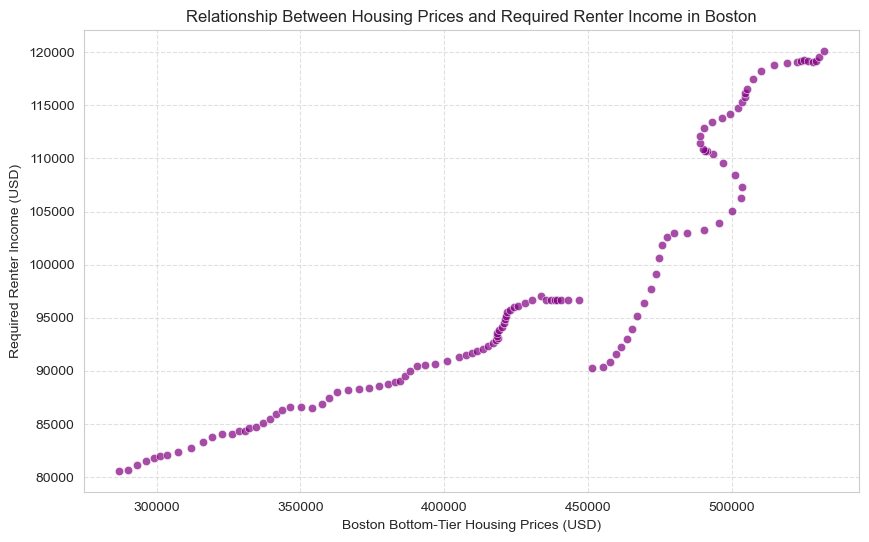

0.9201550883086927

In [9]:
# Merge the two datasets on their index (date) for combined analysis
combined_df = df_boston_t.merge(df_rent_boston_t, left_index=True, right_index=True, how="inner")

# Plot a scatter plot to show the relationship between housing prices and required renter income
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df["Housing_Value"], y=combined_df["Renter_Income_Needed"], color="purple", alpha=0.7)
plt.xlabel("Boston Bottom-Tier Housing Prices (USD)")
plt.ylabel("Required Renter Income (USD)")
plt.title("Relationship Between Housing Prices and Required Renter Income in Boston")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Calculate correlation between housing prices and renter income required
correlation = combined_df["Housing_Value"].corr(combined_df["Renter_Income_Needed"])
correlation

# Understanding the Correlation Between Housing Prices and Required Renter Income

## **The Connection Between Rising Housing Costs and Homelessness Risk**
The strong **positive correlation (0.92)** between Boston’s **bottom-tier housing prices** and the **income required for new renters** reflects a critical affordability crisis. As housing prices increase, the income necessary to secure rental housing also rises—often at a **slower rate than actual home prices**. 

### **1. The Widening Affordability Gap**
- **Housing prices are outpacing income growth**—making homeownership less accessible and keeping more people in the rental market.
- **Renters are spending a larger share of their income on housing**, leaving less room for savings, emergency funds, or upward mobility.
- In **2016**, housing prices increased by **11.42%**, while required renter income grew by only **3.91%**. By **2020**, this gap widened further, reinforcing the strain on renters.

### **2. Renting Is No Longer a Safety Net**
- Renting has traditionally been an alternative for those priced out of homeownership.
- However, with **rental income requirements rising alongside home prices**, **renting itself is becoming unaffordable**.
- **Projected Data:** By **2029**, new renters will need an estimated **$136,473.32** annually to afford housing—a **40.7% increase from 2024**.

### **3. Rising Housing Costs = Rising Homelessness Risk**
- If wages fail to **keep up with rental income requirements**, more households will be forced into **substandard housing, eviction cycles, or homelessness**.
- Lower-income and middle-income families **face the highest risk**, as they lack financial flexibility to absorb rising costs.
- **Without intervention**, Boston could see **higher displacement rates**, where longtime residents are priced out of their communities.

### **4. What Needs to Be Done?**
To prevent a surge in homelessness, policy interventions must include:
- **Rent control or rent stabilization policies** to curb excessive increases.
- **Expansion of affordable housing projects** targeted at middle and lower-income residents.
- **Wage adjustments** to align with housing cost increases.
- **Rental assistance programs and subsidies** to provide relief for those at risk.

### **Final Thought: Will We Be Homeless?**
If housing prices continue to grow at a rate that outpaces wages, more individuals and families will be forced into **unstable housing situations**. The data tells a clear story—without structural policy changes, **Boston’s affordability crisis will worsen, leading to increased financial stress, displacement, and homelessness.**


## Introduction: Wage Growth vs. Housing Affordability in Boston

Boston's housing market has seen **rapid price increases** over the last decade, raising concerns about **housing affordability**. This analysis compares:
- **National Wage Growth (AWI)** – Average wage growth across the U.S.
- **Boston Housing Prices** – Trends in bottom-tier home values.
- **Required Renter Income** – The income needed to rent in Boston.

By normalizing these trends to a **2013 baseline (100)**, this visualization highlights the **disparity between income growth and rising housing costs**.


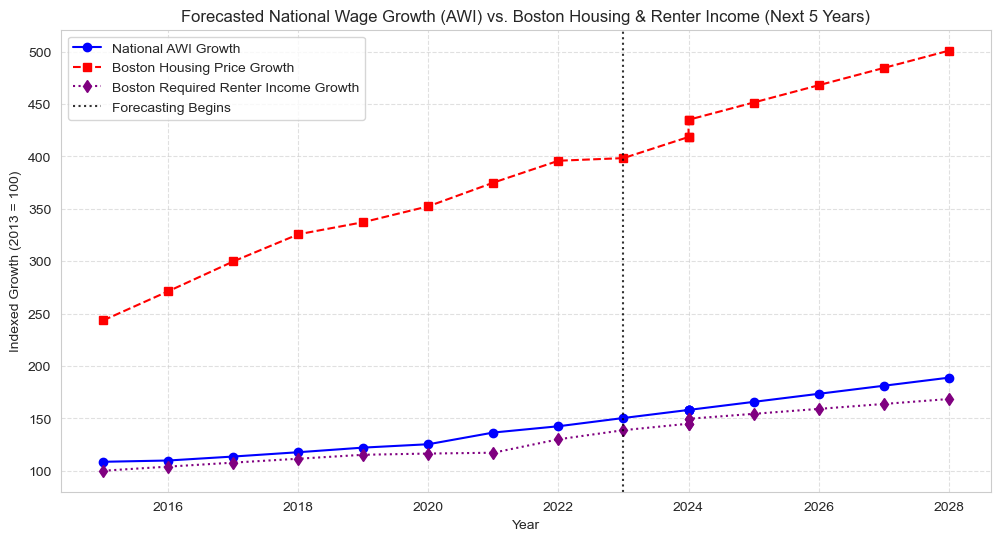

In [12]:
# Resample housing prices and renter income to yearly averages
annual_housing = df_boston_t.resample("Y").mean()
annual_renter_income = df_rent_boston_t.resample("Y").mean()

# Extract the year from the index
annual_housing["Year"] = annual_housing.index.year
annual_renter_income["Year"] = annual_renter_income.index.year

# Define base values for normalization
base_values_housing = annual_housing.iloc[0]["Housing_Value"]
base_values_renter_income = annual_renter_income.iloc[0]["Renter_Income_Needed"]

# AWI data extracted from SSA website (years overlapping with our dataset)
awi_data = {
    "Year": np.arange(2013, 2024),
    "AWI": [
        44321.67, 46481.52, 48098.63, 48642.15, 50321.89, 52145.80, 
        54099.99, 55529.91, 60475.07, 63134.10, 66621.80  # Data up to 2023
    ]
}

# Convert AWI data into a DataFrame
df_awi = pd.DataFrame(awi_data)

# Normalize AWI for indexed growth comparison
base_values_awi = df_awi.iloc[0]["AWI"]
df_awi["AWI_Index"] = (df_awi["AWI"] / base_values_awi) * 100

# Forecast AWI for the next 5 years using exponential smoothing
model_awi_forecast = ExponentialSmoothing(df_awi["AWI"], trend="add", seasonal=None)
fit_awi_forecast = model_awi_forecast.fit()

# Forecast for the next 5 years
future_years = np.arange(2024, 2029)
forecasted_awi = fit_awi_forecast.forecast(steps=5)

# Create a DataFrame for forecasted AWI values
df_forecast_awi = pd.DataFrame({"Year": future_years, "AWI": forecasted_awi})

# Append forecasted data to the existing AWI dataset
df_awi_forecasted = pd.concat([df_awi, df_forecast_awi])

# Normalize AWI for indexed growth comparison
df_awi_forecasted["AWI_Index"] = (df_awi_forecasted["AWI"] / base_values_awi) * 100

# Forecast Boston Housing Prices and Required Renter Income for the next 5 years
model_housing_forecast = ExponentialSmoothing(annual_housing["Housing_Value"], trend="add", seasonal=None)
fit_housing_forecast = model_housing_forecast.fit()
forecasted_housing = fit_housing_forecast.forecast(steps=5)

model_renter_forecast = ExponentialSmoothing(annual_renter_income["Renter_Income_Needed"], trend="add", seasonal=None)
fit_renter_forecast = model_renter_forecast.fit()
forecasted_renter_income = fit_renter_forecast.forecast(steps=5)

# Create DataFrames for forecasted values
df_forecast_housing = pd.DataFrame({"Year": future_years, "Housing_Value": forecasted_housing})
df_forecast_renter_income = pd.DataFrame({"Year": future_years, "Renter_Income_Needed": forecasted_renter_income})

# Append forecasted values to the existing datasets
annual_housing_forecasted = pd.concat([annual_housing, df_forecast_housing])
annual_renter_income_forecasted = pd.concat([annual_renter_income, df_forecast_renter_income])

# Normalize forecasted values for indexed comparison
annual_housing_forecasted["Housing_Index"] = (annual_housing_forecasted["Housing_Value"] / base_values_housing) * 100
annual_renter_income_forecasted["Renter_Income_Index"] = (annual_renter_income_forecasted["Renter_Income_Needed"] / base_values_renter_income) * 100

# Merge forecasted datasets
combined_awi_trends_forecasted = df_awi_forecasted.merge(annual_housing_forecasted, left_on="Year", right_on="Year", how="inner")
combined_awi_trends_forecasted = combined_awi_trends_forecasted.merge(annual_renter_income_forecasted, left_on="Year", right_on="Year", how="inner")

# Plot comparative indexed growth visualization including forecast
plt.figure(figsize=(12, 6))
plt.plot(combined_awi_trends_forecasted["Year"], combined_awi_trends_forecasted["AWI_Index"], marker="o", linestyle="-", color="blue", label="National AWI Growth")
plt.plot(combined_awi_trends_forecasted["Year"], combined_awi_trends_forecasted["Housing_Index"], marker="s", linestyle="--", color="red", label="Boston Housing Price Growth")
plt.plot(combined_awi_trends_forecasted["Year"], combined_awi_trends_forecasted["Renter_Income_Index"], marker="d", linestyle=":", color="purple", label="Boston Required Renter Income Growth")

plt.axvline(x=2023, linestyle="dotted", color="black", alpha=0.8, label="Forecasting Begins")
plt.xlabel("Year")
plt.ylabel("Indexed Growth (2013 = 100)")
plt.title("Forecasted National Wage Growth (AWI) vs. Boston Housing & Renter Income (Next 5 Years)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



## Key Insights from Wage Growth vs. Housing Costs in Boston

1. **Housing Prices Are Rising Faster Than Wages**
   - Since **2013**, **Boston housing prices have increased by over 300%**, while **national wages (AWI) have grown by only ~130%**.
   - This growing gap suggests **wages are not keeping pace with housing costs**.

2. **Renting Is Becoming Increasingly Unaffordable**
   - Required renter income in **2015**: **$82,158**
   - Projected required renter income in **2029**: **$125,000+**
   - **Renters will need significantly higher incomes to afford housing.**

3. **Boston Faces a Worsening Housing Affordability Crisis**
   - If these trends continue, **middle- and lower-income residents may be displaced** due to high costs.
   - **Without intervention**, both renting and homeownership will become **financially unsustainable**.
